In [1]:
!pip install pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.7 MB 1.5 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.7 MB 1.7 MB/s eta 0:00:05
   -------- ------------------------------- 1.8/8.7 MB 2.1 MB/s eta 0:00:04
   ---------- ----------------------------- 2.4/8.7 MB 2.0 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 2.1 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.0 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.0 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.0 MB/s eta 0:00:03
   ------------- -------------------------- 2.9/8.7 MB 2.0 MB/s eta 0:00:03
   ------------- -------

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


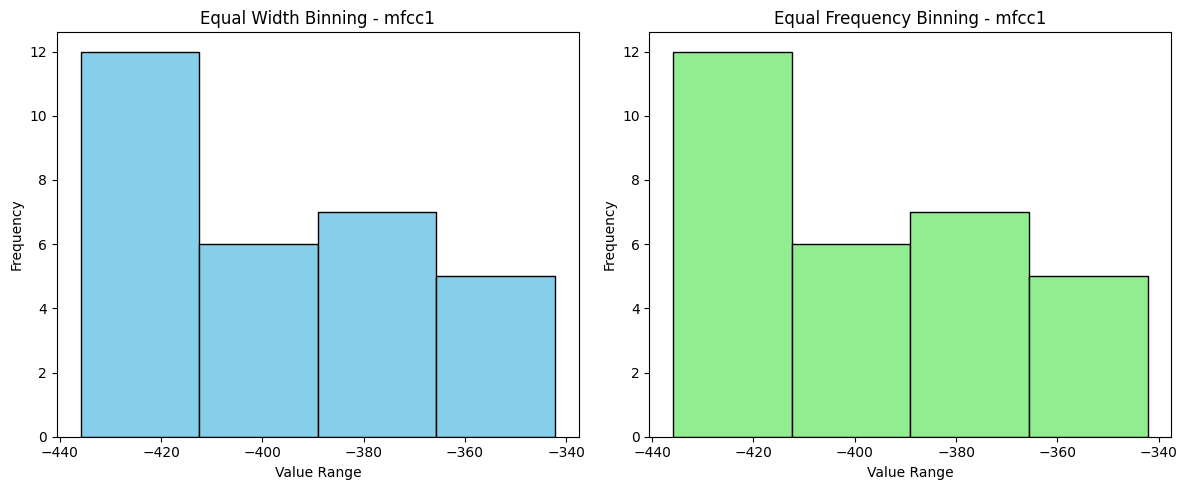

[RESULT] Entropy for 'class': 1.1365


In [12]:
# Lab 06 - A1: Entropy Calculation with Equal Width & Equal Frequency Binning (Histograms)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import KBinsDiscretizer

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target Column ----
target_column = 'class'

# ---- Step 3: Entropy Function ----
def compute_entropy(series):
    """Calculate Shannon Entropy for a categorical series."""
    values, counts = np.unique(series, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# ---- Step 4: Equal Width Binning ----
def equal_width_binning(series, bins=4):
    """Convert continuous values into equal-width bins."""
    return pd.cut(series, bins=bins, labels=False)

# ---- Step 5: Equal Frequency Binning ----
def equal_frequency_binning(series, bins=4):
    """Convert continuous values into equal-frequency bins."""
    est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
    return est.fit_transform(series.to_numpy().reshape(-1, 1)).astype(int).flatten()

# ---- Step 6: Example - Apply on a numeric feature (e.g., mfcc1) ----
feature_name = 'mfcc1'

width_bins = equal_width_binning(df[feature_name], bins=4)
freq_bins = equal_frequency_binning(df[feature_name], bins=4)

# ---- Step 7: Plot Histograms for Both Methods ----
plt.figure(figsize=(12,5))

# Equal Width Histogram
plt.subplot(1, 2, 1)
plt.hist(df[feature_name], bins=4, color='skyblue', edgecolor='black')
plt.title(f"Equal Width Binning - {feature_name}")
plt.xlabel("Value Range")
plt.ylabel("Frequency")

# Equal Frequency Histogram
plt.subplot(1, 2, 2)
plt.hist(df[feature_name], bins=np.unique(freq_bins).size, color='lightgreen', edgecolor='black')
plt.title(f"Equal Frequency Binning - {feature_name}")
plt.xlabel("Value Range")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ---- Step 8: Print Entropy for Target ----
entropy_value = compute_entropy(df[target_column])
print(f"[RESULT] Entropy for '{target_column}': {entropy_value:.4f}")


[Info] Numeric target detected → applying equal-width binning to 4 categories…

[A1] Category counts:
class
bin_0    18
bin_1    11
bin_3     1
bin_2     0
Name: count, dtype: int64


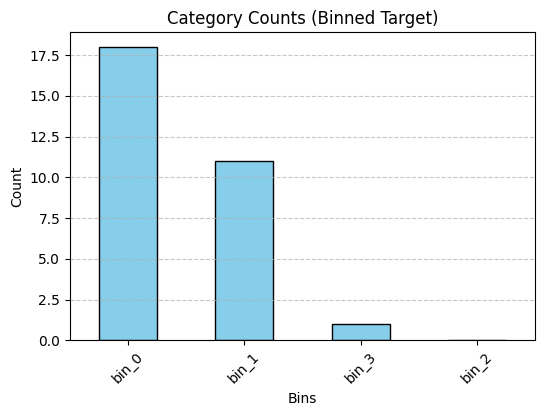

[A1] Entropy: 1.136477334576122


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
# ===============================================================
# Lab 06 - A1: Entropy Calculation with Equal Width Binning (Target Column)
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target Column ----
target_column = 'class'  # Target column in your dataset

# ---- Step 3: Equal Width Binning Function ----
def equal_width_binning(series, bins=4):
    """Bins continuous data into equal-width intervals."""
    bin_labels = [f"bin_{i}" for i in range(bins)]
    return pd.cut(series, bins=bins, labels=bin_labels)

# ---- Step 4: Entropy Function ----
def compute_entropy(series):
    """Calculate Shannon entropy for a categorical variable."""
    counts = series.value_counts()
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# ---- Step 5: Detect Target Type and Apply Binning if Needed ----
if pd.api.types.is_numeric_dtype(df[target_column]):
    print(f"[Info] Numeric target detected → applying equal-width binning to 4 categories…")
    binned_target = equal_width_binning(df[target_column], bins=4)
else:
    print(f"[Info] Target is already categorical.")
    binned_target = df[target_column]

# ---- Step 6: Show Category Counts ----
print("\n[A1] Category counts:")
print(binned_target.value_counts())

# ---- Step 7: Bar Plot ----
plt.figure(figsize=(6,4))
binned_target.value_counts().plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)
plt.title("Category Counts (Binned Target)")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---- Step 8: Calculate and Show Entropy ----
entropy_value = compute_entropy(binned_target)
print(f"[A1] Entropy: {entropy_value}")


[Info] Numeric target detected → applying equal-width binning to 4 categories…

[A2] Category counts:
class
bin_0    18
bin_1    11
bin_3     1
bin_2     0
Name: count, dtype: int64


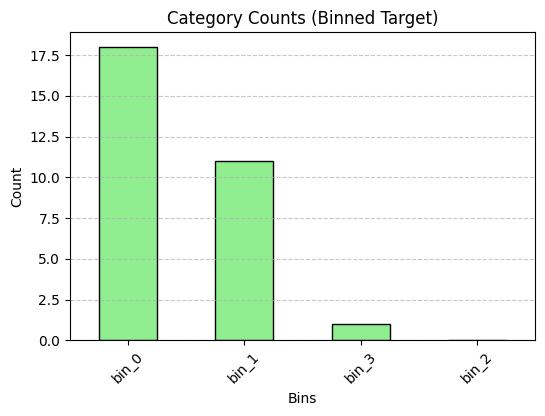

[A2] Gini Index: 0.5044444444444445


In [15]:
# Lab 06 - A2: Gini Index Calculation with Equal Width Binning (Target Column)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target Column ----
target_column = 'class'  # Target column in your dataset

# ---- Step 3: Equal Width Binning Function ----
def equal_width_binning(series, bins=4):
    """Bins continuous data into equal-width intervals."""
    bin_labels = [f"bin_{i}" for i in range(bins)]
    return pd.cut(series, bins=bins, labels=bin_labels)

# ---- Step 4: Gini Index Function ----
def compute_gini_index(series):
    """Calculate Gini Index for a categorical variable."""
    counts = series.value_counts()
    probabilities = counts / counts.sum()
    return 1 - np.sum(probabilities ** 2)

# ---- Step 5: Detect Target Type and Apply Binning if Needed ----
if pd.api.types.is_numeric_dtype(df[target_column]):
    print(f"[Info] Numeric target detected → applying equal-width binning to 4 categories…")
    binned_target = equal_width_binning(df[target_column], bins=4)
else:
    print(f"[Info] Target is already categorical.")
    binned_target = df[target_column]

# ---- Step 6: Show Category Counts ----
print("\n[A2] Category counts:")
print(binned_target.value_counts())

# ---- Step 7: Bar Plot ----
plt.figure(figsize=(6,4))
binned_target.value_counts().plot(
    kind='bar',
    color='lightgreen',
    edgecolor='black'
)
plt.title("Category Counts (Binned Target)")
plt.xlabel("Bins")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# ---- Step 8: Calculate and Show Gini Index ----
gini_value = compute_gini_index(binned_target)
print(f"[A2] Gini Index: {gini_value}")


[A3] Information Gain Scores: {'mfcc1': np.float64(0.37923893030423184), 'rms': np.float64(0.4629171313921061), 'zcr': np.float64(0.05852078698820962), 'pitch_std': np.float64(0.23659525383113422), 'silence_pct': np.float64(0.5612434571467759)}
[A3] Root Node Feature: silence_pct


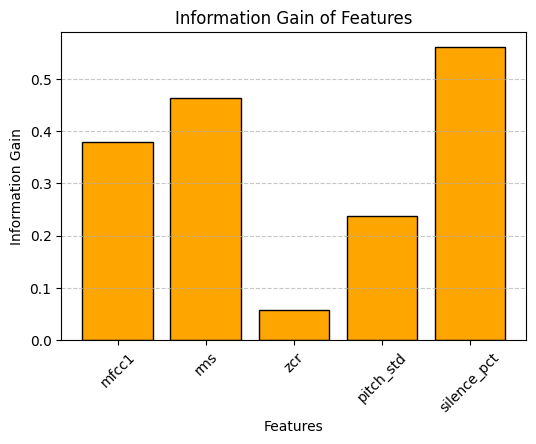

In [16]:
# Lab 06 - A3: Root Node Selection using Information Gain

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target Column ----
target_column = 'class'
feature_columns = [col for col in df.columns if col != target_column and col != 'filename']

# ---- Step 3: Equal Width Binning Function ----
def equal_width_binning(series, bins=4):
    """Bins continuous data into equal-width intervals."""
    bin_labels = [f"bin_{i}" for i in range(bins)]
    return pd.cut(series, bins=bins, labels=bin_labels)

# ---- Step 4: Entropy Function ----
def compute_entropy(series):
    """Calculate Shannon entropy for a categorical variable."""
    counts = series.value_counts()
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# ---- Step 5: Information Gain Function ----
def information_gain(df, feature, target):
    """Calculate Information Gain of a feature relative to the target."""
    total_entropy = compute_entropy(df[target])
    values = df[feature].unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        weighted_entropy += weight * compute_entropy(subset[target])
    return total_entropy - weighted_entropy

# ---- Step 6: Ensure Categorical Data for All Features ----
df_binned = df.copy()
for col in feature_columns:
    if pd.api.types.is_numeric_dtype(df_binned[col]):
        df_binned[col] = equal_width_binning(df_binned[col], bins=4)

# ---- Step 7: Calculate IG for Each Feature ----
ig_scores = {}
for col in feature_columns:
    ig_scores[col] = information_gain(df_binned, col, target_column)

# ---- Step 8: Find Root Node ----
root_node = max(ig_scores, key=ig_scores.get)
print(f"[A3] Information Gain Scores: {ig_scores}")
print(f"[A3] Root Node Feature: {root_node}")

# ---- Step 9: Plot IG Values ----
plt.figure(figsize=(6,4))
plt.bar(ig_scores.keys(), ig_scores.values(), color='orange', edgecolor='black')
plt.title("Information Gain of Features")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[A4] Binning Method: frequency | Number of Bins: 4
[A4] Information Gain Scores: {'mfcc1': np.float64(0.5868031680536867), 'rms': np.float64(0.593696704571036), 'zcr': np.float64(0.1140180537189297), 'pitch_std': np.float64(0.318741702054806), 'silence_pct': np.float64(0.3466997200971339)}
[A4] Root Node Feature: rms


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\preprocessing\_discretization.py:296: FutureWarning: The current 

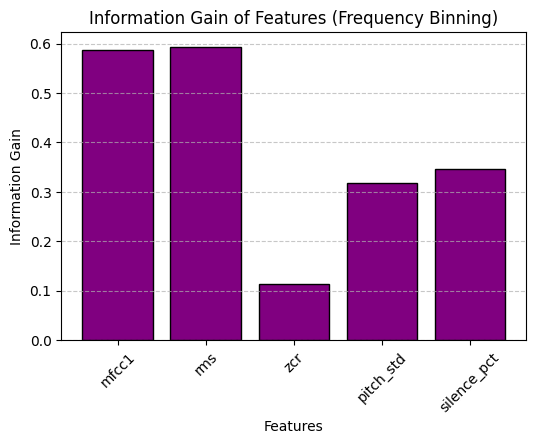

In [17]:
# Lab 06 - A4: Root Node Selection with Flexible Binning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import KBinsDiscretizer

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target Column ----
target_column = 'class'
feature_columns = [col for col in df.columns if col != target_column and col != 'filename']

# ---- Step 3: Flexible Binning Function ----
def binning(series, bins=4, method="width"):
    """
    Bins continuous data using equal-width or equal-frequency strategy.
    
    Parameters:
        series (pd.Series) : Continuous feature column
        bins (int)         : Number of bins (default = 4)
        method (str)       : 'width' for equal-width, 'frequency' for equal-frequency
    """
    bin_labels = [f"bin_{i}" for i in range(bins)]
    
    if method == "width":
        return pd.cut(series, bins=bins, labels=bin_labels)
    elif method == "frequency":
        est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='quantile')
        return pd.Series(est.fit_transform(series.to_numpy().reshape(-1, 1)).astype(int).flatten()).map(
            {i: f"bin_{i}" for i in range(bins)}
        )
    else:
        raise ValueError("Invalid method. Choose 'width' or 'frequency'.")

# ---- Step 4: Entropy Function ----
def compute_entropy(series):
    counts = series.value_counts()
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

# ---- Step 5: Information Gain Function ----
def information_gain(df, feature, target):
    total_entropy = compute_entropy(df[target])
    values = df[feature].unique()
    weighted_entropy = 0
    for val in values:
        subset = df[df[feature] == val]
        weight = len(subset) / len(df)
        weighted_entropy += weight * compute_entropy(subset[target])
    return total_entropy - weighted_entropy

# ---- Step 6: Apply Binning to All Continuous Features ----
bin_method = "frequency"  # Change to "width" for equal-width binning
num_bins = 4

df_binned = df.copy()
for col in feature_columns:
    if pd.api.types.is_numeric_dtype(df_binned[col]):
        df_binned[col] = binning(df_binned[col], bins=num_bins, method=bin_method)

# ---- Step 7: Calculate IG for Each Feature ----
ig_scores = {col: information_gain(df_binned, col, target_column) for col in feature_columns}

# ---- Step 8: Determine Root Node ----
root_node = max(ig_scores, key=ig_scores.get)
print(f"[A4] Binning Method: {bin_method} | Number of Bins: {num_bins}")
print(f"[A4] Information Gain Scores: {ig_scores}")
print(f"[A4] Root Node Feature: {root_node}")

# ---- Step 9: Plot IG Values ----
plt.figure(figsize=(6,4))
plt.bar(ig_scores.keys(), ig_scores.values(), color='purple', edgecolor='black')
plt.title(f"Information Gain of Features ({bin_method.capitalize()} Binning)")
plt.xlabel("Features")
plt.ylabel("Information Gain")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [21]:
# ===============================================================
# Lab 06 - A5: Full Text-Based Decision Tree Structure
# ===============================================================

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target & Features ----
target_column = 'class'
feature_columns = [col for col in df.columns if col not in [target_column, 'filename']]

X = df[feature_columns]
y = df[target_column]

# ---- Step 3: Equal Width Binning ----
def equal_width_binning(series, bins=4):
    return pd.cut(series, bins=bins, labels=False)

X_binned = X.copy()
for col in X_binned.columns:
    if pd.api.types.is_numeric_dtype(X_binned[col]):
        X_binned[col] = equal_width_binning(X_binned[col], bins=4)

# ---- Step 4: Train Decision Tree ----
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_binned, y)

# ---- Step 5: Export Full Tree as Text ----
tree_rules = export_text(
    dt_model,
    feature_names=list(X_binned.columns),
    spacing=3,   # indentation
    decimals=0,  # integer bin labels
    show_weights=False
)

# ---- Step 6: Color & Label Formatting ----
def colorize_tree(text):
    BLUE = "\033[94m"
    RESET = "\033[0m"
    lines = text.split("\n")
    colored_lines = []
    for line in lines:
        if "class:" in line:
            line = line.replace("class:", "[Leaf]")
        elif "<=" in line or ">" in line:
            parts = line.strip().split(" ")
            if parts:
                feat = parts[0]
                val = parts[-1]
                line = line.replace(feat, f"[Feature] {feat}")
                line = line.replace(val, f"[Value] bin_{val}")
        colored_lines.append(BLUE + line + RESET)
    return "\n".join(colored_lines)

# ---- Step 7: Print Full Tree ----
print("[A5] Decision Tree Structure:")
print(colorize_tree(tree_rules))


[A5] Decision Tree Structure:
[Feature] |--- rms <= [Value] bin_0
[Feature] |   [Feature] |--- zcr <= [Value] bin_2
[Feature] |   [Feature] |   [Feature] |--- silence_pct <= [Value] bin_0
|   |   |   |--- [Leaf] 1
[Feature] |   [Feature] |   [Feature] |--- silence_pct >  [Value] bin_0
[Feature] |   [Feature] |   [Feature] |   [Feature] |--- pitch_std <= [Value] bin_2
|   |   |   |   |--- [Leaf] 1
[Feature] |   [Feature] |   [Feature] |   [Feature] |--- pitch_std >  [Value] bin_2
[Feature] |   [Feature] |   [Feature] |   [Feature] |   [Feature] |--- zcr <= [Value] bin_0
|   |   |   |   |   |--- [Leaf] 1
[Feature] |   [Feature] |   [Feature] |   [Feature] |   [Feature] |--- zcr >  [Value] bin_0
[Feature] |   [Feature] |   [Feature] |   [Feature] |   [Feature] |   [Feature] |--- pitch_std <= [Value] bin_2
|   |   |   |   |   |   |--- [Leaf] 1
[Feature] |   [Feature] |   [Feature] |   [Feature] |   [Feature] |   [Feature] |--- pitch_std >  [Value] bin_2
|   |   |   |   |   |   |--- [Leaf] 

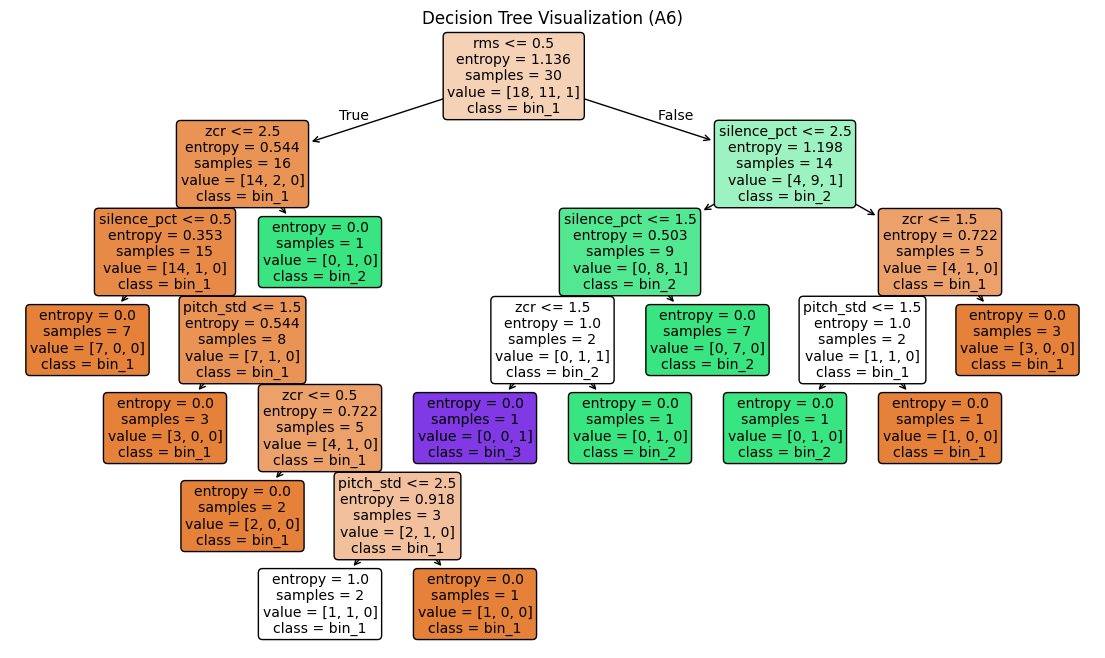

In [22]:
# ===============================================================
# Lab 06 - A6: Decision Tree Visualization
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import KBinsDiscretizer

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Target & Features ----
target_column = 'class'
feature_columns = [col for col in df.columns if col not in [target_column, 'filename']]

X = df[feature_columns]
y = df[target_column]

# ---- Step 3: Equal Width Binning ----
def equal_width_binning(series, bins=4):
    return pd.cut(series, bins=bins, labels=False)

X_binned = X.copy()
for col in X_binned.columns:
    if pd.api.types.is_numeric_dtype(X_binned[col]):
        X_binned[col] = equal_width_binning(X_binned[col], bins=4)

# ---- Step 4: Train Decision Tree ----
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_binned, y)

# ---- Step 5: Plot the Decision Tree ----
plt.figure(figsize=(14, 8))
plot_tree(
    dt_model,
    feature_names=X_binned.columns,
    class_names=[f"bin_{i}" for i in np.unique(y)],
    filled=True,          # Colour fill
    rounded=True,         # Rounded boxes
    impurity=True,        # Show entropy
    proportion=False       # Show raw counts
)
plt.title("Decision Tree Visualization (A6)")
plt.show()


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


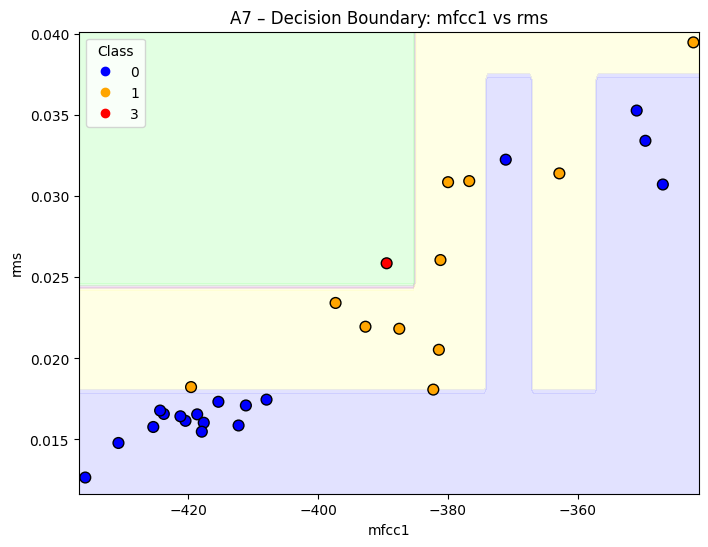

In [23]:
# ===============================================================
# Lab 06 - A7: Decision Boundary Plot (mfcc1 vs rms)
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

# ---- Step 1: Load Dataset ----
df = pd.read_csv(r"C:\semester 5\machine learning\project\VivaData_Set2_23012\features_lab3_labeled.csv")

# ---- Step 2: Select Features and Target ----
X = df[['mfcc1', 'rms']]
y = df['class']

# ---- Step 3: Equal Width Binning for Target ----
def equal_width_binning(series, bins=4):
    return pd.cut(series, bins=bins, labels=False)

y_binned = equal_width_binning(y, bins=4)

# ---- Step 4: Train Decision Tree ----
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X, y_binned)

# ---- Step 5: Prepare Meshgrid for Decision Boundary ----
x_min, x_max = X['mfcc1'].min() - 1, X['mfcc1'].max() + 1
y_min, y_max = X['rms'].min() - 0.001, X['rms'].max() + 0.001
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.5),
    np.arange(y_min, y_max, 0.0005)
)

# ---- Step 6: Predict Classes for Meshgrid ----
Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# ---- Step 7: Plot Decision Boundary ----
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#A0A0FF', '#FFFFAA', '#D0A0D0', '#A0FFA0'])
cmap_points = ListedColormap(['#0000FF', '#FFA500', '#008000', '#FF0000'])

# Filled contour for decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

# Scatter plot of actual points
scatter = plt.scatter(
    X['mfcc1'], X['rms'],
    c=y_binned,
    cmap=cmap_points,
    edgecolor='k',
    s=60
)

# ---- Step 8: Labels, Legend, and Title ----
plt.xlabel('mfcc1')
plt.ylabel('rms')
plt.title('A7 – Decision Boundary: mfcc1 vs rms')
plt.legend(
    handles=scatter.legend_elements()[0],
    labels=[str(i) for i in sorted(y_binned.unique())],
    title="Class"
)
plt.show()
